<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/Na%C3%AFve_Bayes_%26_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naive Bayes & Decision Trees**
© 2022, Zaka AI, Inc. All Rights Reserved.

---

##**Case Study:** Prediction of Swine Flu Disease
<br>**Dataset Explanation:** We will work on a Swine Flu dataset that tells us if a person has the flu or not based on the symptoms he/she is experiencing. The columns in this dataset are:<br>
* Chills: A feature telling if the person has chills or not.
* Runny nose: A feature telling if the person has a runny nose or not.
* Headache: A feature telling the level of headache that a person is experiencing (It could be Miild, Moderate, or No headache).
* Fever: A feature telling if the person has fever or not.
* Flu: The target value that tells us if the person has the flu or not.

#Importing Librarires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Loading the Dataset

First we need to take a look at the dataset before starting to work on it.

In [ ]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
%cd machine_learning_certification/

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Receiving objects: 100% (43/43), 43.23 MiB | 16.46 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/machine_learning_certification


In [ ]:
df = pd.read_csv('flu.csv')
df.head()

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N


As we can see, we have 4 features that will predict if the person has the Swine Flu or not.

Let's check the shape of our data.

In [ ]:
df.shape

(8, 5)

So we have 8 examples in this dataset (A small one! Will be good enough for our demonstration purposes).

Let's next explore some information about it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chills      8 non-null      object
 1   runny nose  8 non-null      object
 2   head ache   8 non-null      object
 3   fever       8 non-null      object
 4   Flu         8 non-null      object
dtypes: object(5)
memory usage: 448.0+ bytes


We do not have any missing values. However, all our features and target variables are of data type object which we can't feed to the model, so we need to clean those.

#Dataset Preprocessing

## Converting Categorical Features to Numerical

First thing to consider is changing the categorical features to Numerical in order to feed them to the algorithm so we are able to run the classification.

This would be useful when we use the decision trees later as well.

In [ ]:
encoder = preprocessing.LabelEncoder()
df['Chills'] = encoder.fit_transform(df['Chills'])
df['runny nose'] = encoder.fit_transform(df['runny nose'])
df['head ache'] = encoder.fit_transform(df['head ache'])
df['fever'] = encoder.fit_transform(df['fever'])
df['Flu'] = encoder.fit_transform(df['Flu'])

df.head(8)

,Chills,runny nose,head ache,fever,Flu
0,1,0,0,1,0
1,1,1,1,0,1
2,1,0,2,1,1
3,0,1,0,1,1
4,0,0,1,0,0
5,0,1,2,1,1
6,0,1,2,0,0
7,1,1,0,1,1


#Naive Bayes

Now we will implement a Naive Bayes Model to classify if a person has the flu or not given that he/she is experiencing some symptoms.

Recall that Naive Bayes Expression is given by Bayes Rule which says: <br><br>
<img src="https://equatio-api.texthelp.com/svg/%5C%20P(%5Ctextcolor%7B%232B7FBB%7D%7BClass%7D%7C%5Ctextcolor%7B%23E94D40%7D%7BFeatures%7D)%3D%5Cfrac%7BP(%5Ctextcolor%7B%23E94D40%7D%7BFeatures%7D%7C%5Ctextcolor%7B%232B7FBB%7D%7BClass%7D)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%232B7FBB%7D%7BClass%7D%5Cright)%7D%7BP(%5Ctextcolor%7B%23E94D40%7D%7BFeatures%7D)%7D" alt="P of open paren C l a. s s divides F of e a. t u r e s close paren equals the fraction with numerator P of open paren F of e a. t u r e s divides C l a. s s close paren times P of open paren C l a. s s close paren and denominator P of F of e a. t u r e s">

In our case, we have:
* **F1:** Chills
* **F2:** runny nose
* **F3:** headache
* **F4:** Fever
* **Class:** Flu or No Flu
 <br>

If the features are assumed to be independent (as is the case with the NB algorithm), the resulting formula can be simplified into: <br><img src="https://equatio-api.texthelp.com/svg/P%5Cleft(%5Ctextcolor%7B%233697DC%7D%7BFlu%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)%3D%5Cfrac%7BP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D)%7D%7BP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cright)%7D" alt="P of open paren F of l u divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren equals the fraction with numerator P of open paren F sub 1 divides F of l u close paren times P of open paren F sub 2 divides F of l u close paren times P of open paren F sub 3 divides F of l u close paren times P of open paren F sub 4 divides F of l u close paren times P of F of l u and denominator P of open paren F sub 1 close paren times P of open paren F sub 2 close paren times P of open paren F sub 3 close paren times P of open paren F sub 4 close paren">

Of course, NB's assumption of independence might not be valid, thus, leading to class conditional probabilities that are not accurate.

However, the equation will still help us get an idea about how high or low the probability is.

Since the denomenator is the same for both P(Flu) and P(No Flu), we can cancel the denomenator and base the classification on the numerator value alone. <br><br>
<img src="https://equatio-api.texthelp.com/svg/P%5Cleft(%5Ctextcolor%7B%233697DC%7D%7BFlu%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)%5Cpropto%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%7D)" alt="P of open paren F of l u divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren proportional to P of open paren F sub 1 divides F of l u close paren times P of open paren F sub 2 divides F of l u close paren times P of open paren F sub 3 divides F of l u close paren times P of open paren F sub 4 divides F of l u close paren times P of F of l u">

So, given a set of features, what we do is calculate P1 and P2, which are P(Flu) and P(No Flu), respectively.  Finally, the larger between them is chosen to be the predicted class for the given data sample.<br> <br>
<img src="https://equatio-api.texthelp.com/svg/P_1%3DP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D)%5C%20%5Cpropto%20P%5Cleft(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)" alt="P sub 1 equals P of open paren F sub 1 divides F of l u equals Y E S close paren times P of open paren F sub 2 divides F of l u equals Y E S close paren times P of open paren F sub 3 divides F of l u equals Y E S close paren times P of open paren F sub 4 divides F of l u equals Y E S close paren times P of open paren F of l u equals Y E S close paren proportional to P of open paren F of l u equals Y E S divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren">
<br>
<img src="https://equatio-api.texthelp.com/svg/P_2%3DP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D)%5C%20%5Cpropto%20P%5Cleft(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)" alt="P sub 2 equals P of open paren F sub 1 divides F of l u equals N O close paren times P of open paren F sub 2 divides F of l u equals N O close paren times P of open paren F sub 3 divides F of l u equals N O close paren times P of open paren F sub 4 divides F of l u equals N O close paren times P of open paren F of l u equals N O close paren proportional to P of open paren F of l u equals N O divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren">
<br>


* If P1>P2 --> The Person has the flu
* If P1<P2 --> The person does not have the flu

## Naive Bayes from Scracth



In [ ]:
def naive_bayes (data, features, target_name):
  #We assume the user will give a numpy array of fetaures
  n_examples = len(data)
  n_features = features.shape[0]

  #Seperating the dataset samples depending on the target value
  target_yes = data [data[target_name] == 1] # samples for YES
  target_no = data[data[target_name] == 0] # samples for NO

  #Computing independent probabilities of class YES and No
  p_target_yes = len(target_yes)/float(n_examples) # P(Flu=YES)
  p_target_no = len(target_no)/float(n_examples) # P(Flu=NO)

  #For each feature F, we need to compute the conditional probabilities: P(Features | flu=YES) and P(Features | flu=NO)
  #We create two lists that will hold the probabilities of each feature conditioned upon the class (P(F1 | flu), P(F2 | flu),..)

  p_feature_given_target_yes = []
  p_feature_given_target_no = []

  for i in range (features.shape[0]): #Loop through all 4 features

    #Calculate P(F/Target=yes)
    p_f_given_t_y = len(target_yes[target_yes.iloc[:,i] == features[i]])/float(len(target_yes))
    p_feature_given_target_yes.append(p_f_given_t_y) #Append probabilities of all features conditioned on class Flu=YES

    #Calculate P(F/Target=no)
    p_f_given_t_n = len(target_no[target_no.iloc[:,i] == features[i]])/float(len(target_no))
    p_feature_given_target_no.append(p_f_given_t_n) #Append probabilities of all features conditioned on class Flu=NO

  #Finally, we need to apply Bayes' rule formula
  #Note that np.prod multiplies all the elements of a list

  p1 = np.prod(p_feature_given_target_yes)*p_target_yes
  p2 = np.prod(p_feature_given_target_no)*p_target_no

  return [p1>p2] #Will return a Boolean on whether the condition is satisfied or not

### Make a Prediction

Now we will use the function that we implemented to know how much likely  a person having specific symptoms is suffering from flu.

We will consider the following features for our person.
* **Chills:** Yes (1)
* **runny nose:** Yes (1)
* **headache:** Mild (1)
* **Fever:** Yes (1)

In [ ]:
features = np.array([1, 1, 1, 1])
target_name = 'Flu'
result = naive_bayes(df, features, target_name)

print(result)

[True]


Given that p1 is greater than p2, then we can predict the person HAS the flu.

## Naive Bayes in Scikit learn

In [ ]:
from sklearn.naive_bayes import CategoricalNB

X = df.drop('Flu', axis=1)
Y = df['Flu']

clf = CategoricalNB()
clf.fit(X, Y)

result = clf.predict([[1,1,1,1]])
print(result)

#We can predict the probability of the class here.
print(clf.predict_proba([[1,1,1,1]]))

[1]
[[0.14938211 0.85061789]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


Again, class 1 has a higher probability, which means the person HAS the flu - which is a similar result from what we got with our NB algorithm built from scratch!



---

#Decision Trees

Now, we will try to solve the same problem but using decision trees that we learned about during the course.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Flu', axis=1)
Y = df['Flu']

decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes= 10)
decision_tree_classifier.fit(X,Y)

DecisionTreeClassifier(max_leaf_nodes=10)

##Printing Text Structure of the tree

In [ ]:
from sklearn import tree

text_representation = tree.export_text(decision_tree_classifier, feature_names=['Chills', 'Runny Nose', 'Headache', 'Fever'])
print(text_representation)

|--- Runny Nose <= 0.50
|   |--- Headache <= 1.50
|   |   |--- class: 0
|   |--- Headache >  1.50
|   |   |--- class: 1
|--- Runny Nose >  0.50
|   |--- Fever <= 0.50
|   |   |--- Headache <= 1.50
|   |   |   |--- class: 1
|   |   |--- Headache >  1.50
|   |   |   |--- class: 0
|   |--- Fever >  0.50
|   |   |--- class: 1



##Plotting the tree to see its structure

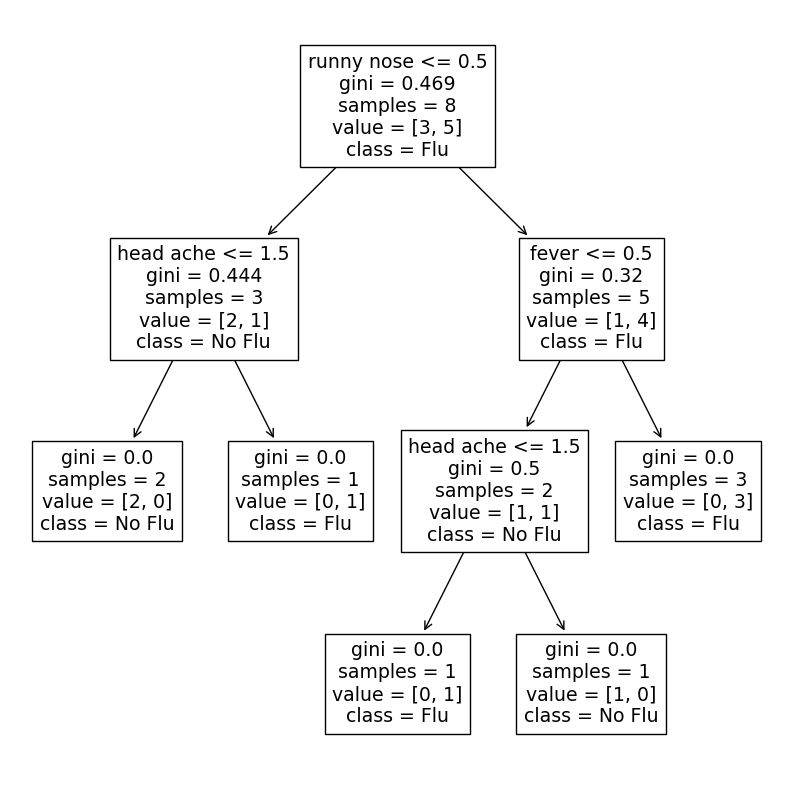

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_classifier, feature_names=X.columns, class_names=['No Flu', 'Flu'])
plt.show()

##Predicting using a Decision Tree

In [ ]:
features = np.array([1,1,1,1])

result = decision_tree_classifier.predict([features])
print("This person has the flue:", result)

This person has the flue: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Once again, we get the same result from our DT as our NB algorithm.